## Observations and Insights 

1. The summary statistics show that both Capomulin and Ramicane have the lowest average volume of tumors among drug regimens. Furthermore, the comparative analysis of the four specific regimens confirms that Capomulin and Ramicane significantly have a lower tumor volume than the other two drugs. We could conclude that Capomulin and Remicane show an effective result in cancer treatment in mice. However, the number of mice distributed in both regimens is higher than in others. This could regulate the conclusion above.

2. As a sample of mice in Capomulin treatment, mouse ID y793 shows a significant decrease in tumor volume by time point (days). In other words, the total tumor volume of the mouse dropped by approximately 68% within 45 days. For a more accurate conclusion, analysis among other mice is necessary. 

3. The analysis between mouse wights and tumor volume on the last day of treatment shows a noticeable correlation, with regression number (r = 0.84, p =<0.001).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from operator import itemgetter

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
mice_dup_id = mice_dup['Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dup_df = combined_df[combined_df['Mouse ID'] == 'g989']
mice_dup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df = combined_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'],
                                            keep = 'first')

In [6]:
# Checking the number of mice in the clean DataFrame.
total_count = mice_clean_df['Mouse ID'].nunique()
total_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [8]:
df = mice_clean_df
tumor_drug_mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_drug_med = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_drug_var = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_drug_std = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_drug_sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sum_sts_df1 = pd.DataFrame({'Mean' : tumor_drug_mean,
                           'Median' : tumor_drug_med,
                           'Variance' : tumor_drug_var,
                           'Standard deviation' : tumor_drug_std,
                           'SEM' : tumor_drug_sem})
print('Tumor Volume (mm3)')
sum_sts_df1

Tumor Volume (mm3)


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_sts_df2 = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
sum_sts_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_drug_count = df.groupby('Drug Regimen')['Timepoint'].count()

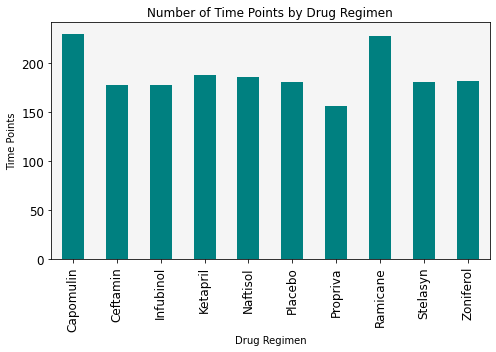

In [11]:
ax1 = time_drug_count.plot(kind = 'bar',
                     figsize = (7, 5),
                     facecolor = 'teal',
                     title = 'Number of Time Points by Drug Regimen',
                     align = 'center',
                     fontsize = 12)
plt.ylabel('Time Points')
ax1.set_facecolor('whitesmoke')
plt.tight_layout()
plt.savefig('graph/Bar_v1.png')
plt.show()

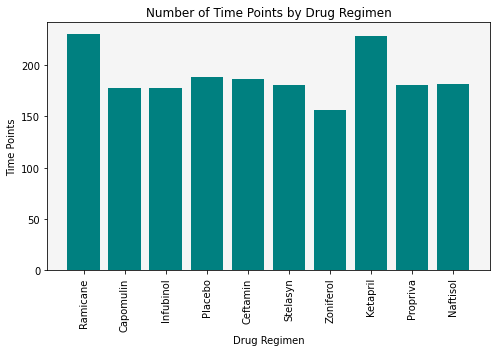

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
time_drug_count_list = time_drug_count.tolist()
drug_list = df['Drug Regimen'].unique().tolist()
x_axis = np.arange(len(drug_list))
tick_loc = [e for e in x_axis]

fig2, ax2 = plt.subplots(figsize = (7, 5))
plt.bar(x_axis, time_drug_count_list, color = 'teal')
plt.xticks(tick_loc, drug_list, rotation = "vertical")
plt.title('Number of Time Points by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Points')
ax2.set_facecolor('whitesmoke')
plt.tight_layout()
plt.savefig('graph/Bar_v2.png')
plt.show()

In [13]:
# Group by gender
gender_count = df.groupby('Sex')['Mouse ID'].nunique()
gender_percent = (gender_count/total_count)*100
gender_df = pd.DataFrame({'Total Count' : gender_count,
                          'Percentage'  : gender_percent})
gender_df

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


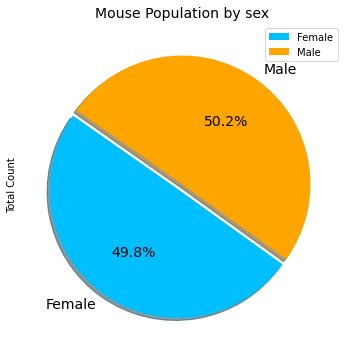

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ax3 = gender_df.plot.pie(y = 'Total Count',
                          figsize = (5, 5),
                          fontsize = 14,
                          colors = ['deepskyblue', 'orange'],
                          startangle = 145, 
                          explode = (.05, 0), 
                          shadow = True,
                          autopct = "%1.1f%%") 
plt.title('Mouse Population by sex', fontsize = 14)
plt.tight_layout()
plt.savefig('graph/Pie_v1.png')
plt.show()

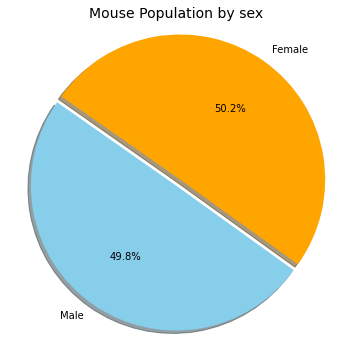

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = df['Sex'].unique()
size = gender_df['Percentage']
explode = (.05, 0)
colors = ['skyblue', 'orange']
fig4, ax4 = plt.subplots(figsize = (5, 5))
ax4.pie(size, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 145)
ax4.axis('equal')
plt.title('Mouse Population by sex', fontsize = 14)
plt.tight_layout()
plt.savefig('graph/Pie_v2.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df = df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
timepoint_max_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tpmax_df = timepoint_max_df.merge(df, on = ['Mouse ID', 'Timepoint'])
tpmax_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = itemgetter(0, 2, 5, 9)(tpmax_df['Drug Regimen'].unique().tolist())
# Create empty list to fill with tumor vol data (for plotting)
tumor_vlist = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tuvo = tpmax_df.loc[tpmax_df['Drug Regimen'] == t, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vlist.append(treatment_tuvo)
    # Determine outliers using upper and lower bounds
    quartiles = treatment_tuvo.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    innerq_range = upperq - lowerq
    lower_bound = lowerq - (1.5*innerq_range)
    upper_bound = upperq + (1.5*innerq_range)

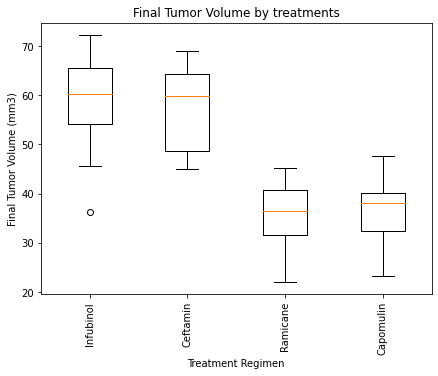

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig5, ax5 = plt.subplots(figsize = (7, 5))
ax5.set_title('Final Tumor Volume by treatments')
ax5.set_ylabel('Final Tumor Volume (mm3)')
ax5.set_xlabel('Treatment Regimen')
ax5.boxplot(tumor_vlist, labels = treatments)
plt.xticks(rotation = 90)
plt.savefig('graph/BoxPlot.png')
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice = df.groupby('Drug Regimen')['Mouse ID'].unique()
capo_mice['Capomulin'][5]

'y793'

In [20]:
mouse_y793 = df.loc[df['Mouse ID'] == 'y793', : ]
mouse_y793

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


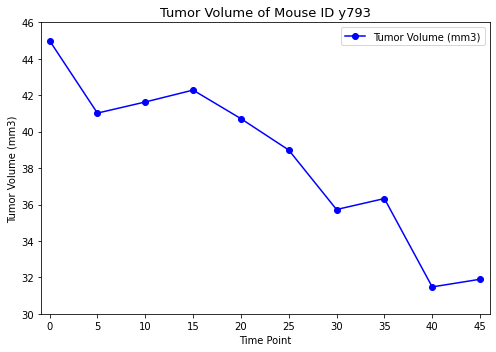

In [21]:
ax6 = mouse_y793.plot.line(x = 'Timepoint',
                           y = 'Tumor Volume (mm3)',
                           figsize = (7, 5),
                           color = "b",
                           marker = 'o')
ax6.set_xticks(np.arange(0, max(mouse_y793.Timepoint) + 5, 5))
plt.title('Tumor Volume of Mouse ID y793', fontsize = 13)
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-0.9, 46)
plt.ylim(30, 46)
plt.tight_layout()
plt.savefig('graph/LinePlot.png')
plt.show()

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = df.loc[df['Drug Regimen'] == 'Capomulin']
capo_mean = capo_df.groupby('Mouse ID').mean()
capo_mean.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


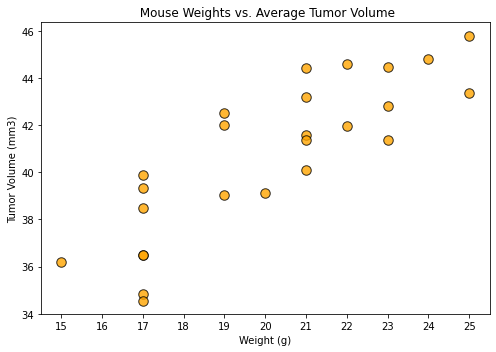

In [23]:
ax7 = capo_mean.plot(kind = 'scatter',
            x = 'Weight (g)',
            y = 'Tumor Volume (mm3)',
            color = 'orange',
            alpha = 0.8,
            title = ' Mouse Weights vs. Average Tumor Volume',
            figsize = (7, 5),
            s = 90,
            marker = 'o',
            edgecolors = 'k')
plt.xticks(np.arange(min(capo_mean['Weight (g)']), max(capo_mean['Weight (g)']) + 1, 1))
plt.tight_layout()
plt.savefig('graph/ScatterPlot.png')
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

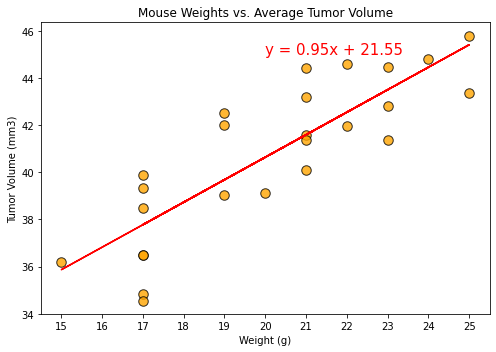

The correlation coefficient between weight and tumor volume is 0.84


In [25]:
weight_avg = capo_mean['Weight (g)']
tumor_avg = capo_mean['Tumor Volume (mm3)']
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_avg, tumor_avg)

regress = weight_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax8 = capo_mean.plot(kind = 'scatter',
            x = 'Weight (g)',
            y = 'Tumor Volume (mm3)',
            color = 'orange',
            alpha = 0.8,
            title = 'Mouse Weights vs. Average Tumor Volume',
            figsize = (7, 5),
            s = 90,
            marker = 'o',
            edgecolors = 'k')
plt.plot(weight_avg,regress,"r-")
plt.annotate(line_eq, (20,45), fontsize = 15, color = "red")
plt.xticks(np.arange(min(capo_mean['Weight (g)']), max(capo_mean['Weight (g)']) + 1, 1))
plt.tight_layout()
plt.savefig('graph/Correlation_Regression.png')
plt.show()
print(f"The correlation coefficient between weight and tumor volume is {round(rvalue, 2)}")